In [ ]:
#Import requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

frog


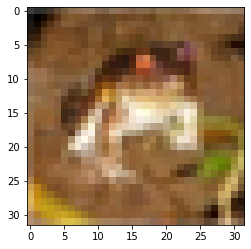

In [ ]:
plt.imshow(x_train[0])
print(y_classes[np.argmax(y_train[0])])

truck


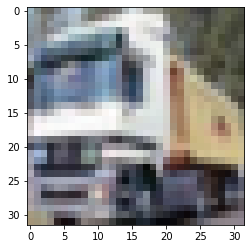

In [ ]:
plt.imshow(x_train[1])
print(y_classes[np.argmax(y_train[1])])

In [ ]:
#import VGG-16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
base_model.trainable = False ## Not trainable weights

#preprocess input
x_train = preprocess_input(x_train) 
x_test = preprocess_input(x_test)

In [ ]:
#summary of base model
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#add our classification layers
model = Sequential([base_model])
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#summary of final model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [ ]:
#Train model
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
313/313 [==============================] - 18s 27ms/step - loss: 1.8892 - accuracy: 0.4837 - val_loss: 1.1579 - val_accuracy: 0.5988
Epoch 2/30
313/313 [==============================] - 7s 24ms/step - loss: 1.1555 - accuracy: 0.5983 - val_loss: 1.0613 - val_accuracy: 0.6312
Epoch 3/30
313/313 [==============================] - 8s 24ms/step - loss: 1.0241 - accuracy: 0.6428 - val_loss: 1.0205 - val_accuracy: 0.6478
Epoch 4/30
313/313 [==============================] - 8s 24ms/step - loss: 0.9328 - accuracy: 0.6725 - val_loss: 1.0022 - val_accuracy: 0.6571
Epoch 5/30
313/313 [==============================] - 8s 24ms/step - loss: 0.8641 - accuracy: 0.6921 - val_loss: 0.9894 - val_accuracy: 0.6617
Epoch 6/30
313/313 [==============================] - 8s 25ms/step - loss: 0.8082 - accuracy: 0.7134 - val_loss: 0.9859 - val_accuracy: 0.6657
Epoch 7/30
313/313 [==============================] - 8s 25ms/step - loss: 0.7488 - accuracy: 0.7298 - val_loss: 0.9868 - val_accuracy: 0.669

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

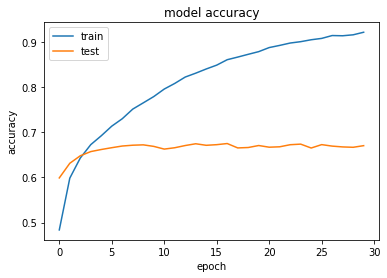

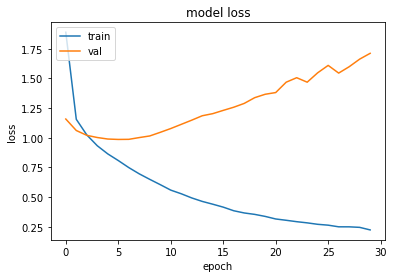

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.7181 - accuracy: 0.6645


[1.7181050777435303, 0.6644999980926514]

In [ ]:
pred = model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


actual class:cat
predicted class:cat


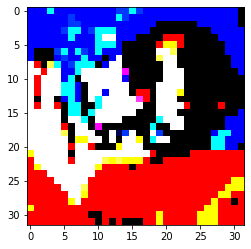

In [ ]:
plt.imshow(x_test[0])
print("actual class:" + y_classes[np.argmax(y_test[0])])
print("predicted class:" + y_classes[np.argmax(pred[0])])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


actual class:ship
predicted class:ship


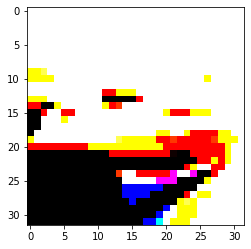

In [ ]:
plt.imshow(x_test[1])
print("actual class:" + y_classes[np.argmax(y_test[1])])
print("predicted class:" + y_classes[np.argmax(pred[1])])